<h1 style="text-align:center;background-color:#336699;color:white;">TP4
Clustering de données</h1>
<h3 style="color:#8080C0">A. K-Moyennes :</h3>
<h4>1. Écrivez en python l’algorithme des K-Moyennes sous la forme d’une fonction. Vous trouverez une description de l’algorithme dans le cours ou sur internet. La fonction prend en entrée deux paramètres : la matrice des données et le nombre de clusters que l’on souhaite. Testez sur les données Iris ou sur des données que vous générez. Comparez avec la fonction Kmeans de sklearn.</h4>

In [59]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
@author: QIAN Xiaotong
@author: BIAN Yiping
"""

from sklearn import * 
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def k_moyenne(matrice,nbCluster):
    dic={}
    
    # etape 1
    # recuperer le nombre de colonne(variable) 
    nbCol = matrice.shape[1]
    # et le nombre de ligne(nombre de données)
    nbLigne = matrice.shape[0]
    
    # etape 2
    # Sélectionnez aléatoirement K objets parmi N données 
    # comme centres de gravité du cluster initial.
    np.random.shuffle(matrice)
    center = matrice[0:nbCluster]
    # evider de choisir le meme points comme le centre
    while (center.shape[0] != len(np.unique(center,axis=0))):
        np.random.shuffle(matrice)
        center = matrice[0:nbCluster]

    center_new = np.zeros((nbCluster,nbCol))
    
    # matrice de label a renvoyer
    res_mat = np.zeros(nbLigne)
    
    if nbCluster > 1:
        # il a besoin de faire au moins une fois, et je connais pas comment faire do...while en python
        # Donc je copier-coller le code dans le boucle while 
        center_means = np.zeros((nbCluster,nbCol))
        # etape 3
        # Distribuer chaque donnée dans un cluster en calculant la distance entre chaque centre
        for i in range(nbLigne):
            distance = np.zeros(nbCluster)
            for j in range(nbCluster):
                distance[j] = euclidean_distances([matrice[i],center[j]])[0][1]
                
            res_mat[i] = np.argmin(distance)
                
        # etape 4
        # Recalculer le centre de chaque cluster
        for k in range(nbCluster):
            center_means[k] = matrice[np.where(res_mat==k)[0]].mean(axis=0)
            center_new[k] = center_means[k]
           
        while((center_new == center).all() == False):
            #copier la valeur de center_new dans center
            center[:] = center_new[:]

            center_means = np.zeros((nbCluster,nbCol))
            # etape 3
            # Distribuer chaque donnée dans un cluster en calculant la distance entre chaque centre
            for i in range(nbLigne):
                distance = np.zeros(nbCluster)
                for j in range(nbCluster):
                    distance[j] = euclidean_distances([matrice[i],center[j]])[0][1]
                
                res_mat[i] = np.argmin(distance)     
            # etape 4
            # Recalculer le centre de chaque cluster
            for k in range(nbCluster):
                center_means[k] = matrice[np.where(res_mat==k)[0]].mean(axis=0)
                center_new[k] = center_means[k]
            # etape 5
            # Si nouvelle centre équal à ancienne centre on renvoie le resultat
            # Sinon on refait la boucle
    
    dic['label'] = res_mat
    dic['center'] = center_new
    return dic

In [60]:
iris = datasets.load_iris()
k = 4
k_moyen = k_moyenne(iris.data,k)
print(k_moyen['label'])
for i in range(k):
    print("le nombre de valeurs du cluster ",i," : ",np.where(k_moyen['label'] == i)[0].size)

[0. 1. 2. 3. 1. 1. 1. 2. 1. 1. 0. 2. 3. 2. 1. 0. 1. 2. 1. 1. 1. 1. 3. 1.
 3. 1. 1. 1. 2. 1. 1. 2. 0. 0. 2. 3. 2. 1. 1. 3. 2. 0. 1. 0. 2. 0. 0. 1.
 0. 1. 1. 3. 1. 3. 1. 2. 2. 2. 1. 1. 1. 2. 3. 0. 1. 2. 2. 1. 2. 3. 2. 2.
 1. 2. 3. 1. 1. 2. 3. 2. 2. 3. 2. 2. 2. 3. 3. 2. 1. 1. 2. 2. 1. 0. 0. 0.
 0. 3. 3. 1. 1. 3. 1. 3. 3. 1. 1. 2. 1. 0. 1. 0. 3. 0. 2. 0. 2. 1. 0. 2.
 3. 0. 0. 1. 3. 2. 0. 3. 0. 3. 0. 3. 3. 2. 3. 1. 2. 3. 0. 1. 1. 2. 2. 1.
 2. 3. 0. 1. 3. 3.]
le nombre de valeurs du cluster  0  :  27
le nombre de valeurs du cluster  1  :  51
le nombre de valeurs du cluster  2  :  40
le nombre de valeurs du cluster  3  :  32


In [61]:
kmeans = KMeans(n_clusters=k).fit(iris.data)
k_means = kmeans.labels_
print(k_means)
for i in range(k):
    print("le nombre de valeurs du cluster ",i," : ",np.where(k_means == i)[0].size)

[0 2 3 1 2 2 2 3 2 2 0 3 3 3 2 0 2 3 2 2 2 2 3 2 1 2 2 2 3 2 2 3 0 0 3 1 3
 2 2 1 3 0 2 0 3 0 0 2 0 2 2 1 2 1 2 3 3 3 2 2 2 3 1 0 2 3 3 2 3 1 3 3 2 3
 1 2 2 3 1 3 3 1 3 3 3 1 1 3 2 2 3 3 2 0 0 0 0 1 1 2 2 1 2 3 1 2 2 3 2 0 2
 0 1 0 3 0 3 2 0 3 1 0 0 2 3 3 0 1 0 1 0 1 1 3 1 2 3 3 0 2 2 3 3 2 3 1 0 2
 1 1]
le nombre de valeurs du cluster  0  :  27
le nombre de valeurs du cluster  1  :  27
le nombre de valeurs du cluster  2  :  51
le nombre de valeurs du cluster  3  :  45


<h4>2. Expérimenter l’instabilité due à l’initialisation : les centres des clusters étant choisis au hasard lors de l’initialisation, le résultat obtenu peut varier d’une exécution à l’autre. Vérifiez que c’est le cas.</h4>

In [62]:
k_moyen = k_moyenne(iris.data,k)
print(k_moyen['label'])
for i in range(k):
    print("le nombre de valeurs du cluster ",i," : ",np.where(k_moyen['label'] == i)[0].size)

[0. 1. 2. 3. 1. 1. 2. 3. 1. 3. 3. 0. 0. 3. 2. 2. 1. 3. 3. 3. 2. 3. 3. 3.
 2. 2. 1. 3. 3. 0. 1. 1. 2. 1. 2. 3. 3. 2. 1. 3. 3. 2. 1. 2. 1. 2. 2. 1.
 1. 0. 3. 3. 2. 3. 3. 1. 1. 1. 0. 3. 3. 3. 2. 3. 0. 3. 3. 1. 2. 3. 2. 1.
 3. 3. 3. 3. 0. 3. 3. 3. 1. 2. 3. 2. 3. 3. 3. 0. 3. 2. 3. 3. 1. 3. 1. 3.
 0. 3. 1. 3. 1. 3. 2. 2. 3. 1. 2. 2. 3. 3. 1. 0. 0. 1. 3. 2. 1. 2. 3. 3.
 2. 2. 1. 2. 1. 2. 2. 3. 3. 1. 2. 2. 3. 1. 1. 0. 1. 2. 2. 3. 3. 3. 1. 0.
 0. 0. 3. 2. 3. 3.]
le nombre de valeurs du cluster  0  :  16
le nombre de valeurs du cluster  1  :  35
le nombre de valeurs du cluster  2  :  37
le nombre de valeurs du cluster  3  :  62


In [63]:
kmeans = KMeans(n_clusters=4).fit(iris.data)
k_means = kmeans.labels_
print(k_means)
for i in range(k):
    print("le nombre de valeurs du cluster ",i," : ",np.where(k_means == i)[0].size)

[0 0 2 3 0 0 2 3 0 1 3 0 0 3 2 2 0 1 3 1 2 1 3 3 2 2 0 3 1 0 0 0 1 0 2 3 3
 2 0 3 1 1 0 1 0 2 1 0 0 0 3 3 2 1 1 0 0 0 0 1 3 3 2 3 0 1 1 0 2 1 1 0 1 3
 1 3 0 3 1 1 0 1 1 1 1 1 3 0 3 1 1 1 0 3 0 3 0 1 0 1 0 1 2 2 3 0 2 2 3 1 0
 0 0 0 3 2 0 1 1 1 1 1 0 2 0 1 2 3 1 0 2 2 1 0 0 0 0 2 1 1 3 3 0 0 0 0 3 1
 1 1]
le nombre de valeurs du cluster  0  :  51
le nombre de valeurs du cluster  1  :  46
le nombre de valeurs du cluster  2  :  23
le nombre de valeurs du cluster  3  :  30


<p style="color:green">Selon le résultat obtenu, la méthode qu'on défini a bien distribué le même nombre de clusters que la méthode KMeans du python, mais car les deux ne sont pas stable, donc à chaque fois qu'on obtient pas la même chose. </p>
<h4>3. Utiliser l’indice de Silhouette (qui est dans le package sklearn) pour stabiliser les résultats et sélectionner automatiquement le nombre de groupes. Pour ce faire, créez un script qui applique K-moyenne sur les données pour différents nombres de clusters allant de 2 à 10, 10 fois pour chaque nombre de clusters (soit 90 fois en tout) et qui renvoie la solution ayant le meilleur score de Silhouette.</h4>

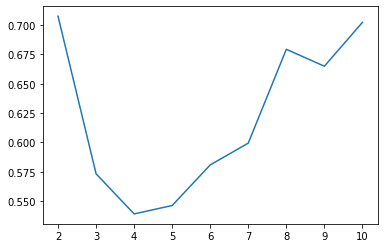

In [14]:
silhouette_avg = []
for i in range(2,11):
    kmoyenne_label=np.zeros((10,iris.data.shape[0]))
    sum = 0
    for j in range(10):
        kmoyenne_label[j] = k_moyenne(iris.data,i)['label']
        sum = sum + silhouette_score(iris.data, kmoyenne_label[j])
    silhouette_avg.append(sum/10)
plt.figure()
plt.plot(range(2,11),silhouette_avg)


<p style="color:green">Essayer plusieurs fois, On peut voir très bien sur le graphe, le nombre de cluster optimal est 8<p>
<h4>4. Utiliser une ACP (fonction PCA de sklearn) pour vérifier visuellement la cohérence des groupes obtenus. Vérifier aussi visuellement la séparabilité et la compacité de ces groupes à l’aide d’une ADL (fonction LinearDiscriminantAnalysis de sklearn). Quelle est la différence entre les deux méthodes ?
</h4>

(-1.2679384783331162, 1.3669706347717852)

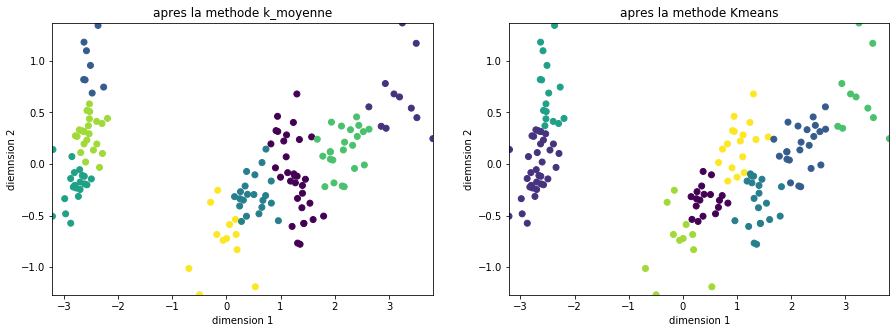

In [69]:
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = PCA(n_components=2)
x_p = pca.fit(iris.data).transform(iris.data)

x = x_p[:,0]
y = x_p[:,1]
x_min,x_max = x.min(),x.max()
y_min,y_max = y.min(),y.max()

label = k_moyenne(x_p,8)['label']
label2 = KMeans(n_clusters=8).fit(x_p).labels_

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('apres la methode k_moyenne')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.subplot(122)
plt.title('apres la methode Kmeans')
plt.scatter(x, y, c=label2)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

(-1.2679384783331162, 1.3669706347717852)

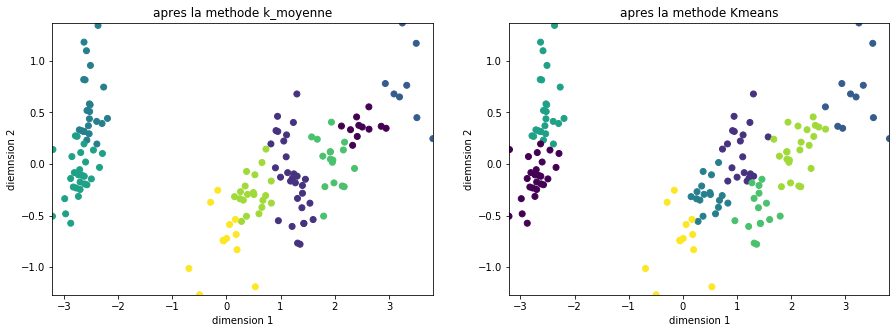

In [70]:
label = k_moyenne(x_p,8)['label']
label2 = KMeans(n_clusters=8).fit(x_p).labels_

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('apres la methode k_moyenne')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.subplot(122)
plt.title('apres la methode Kmeans')
plt.scatter(x, y, c=label2)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

<p style="color:green">Selon le résultat obtenu, on a obetnu deux cas audessus, qui resemble à K-means en python, mais il reste à améliorer.</p>

(-2.7705293301792215, 2.908580456015364)

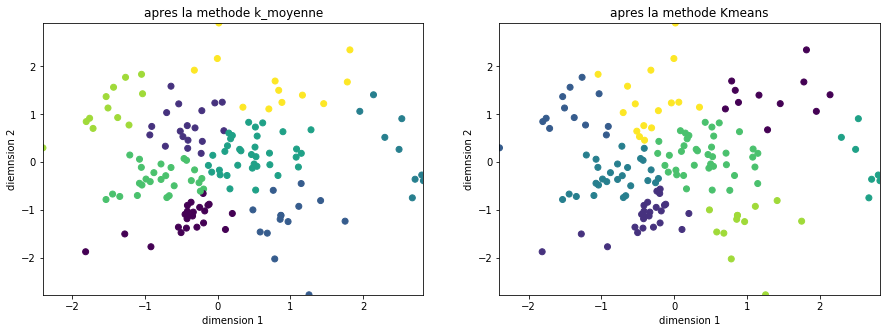

In [101]:
# Avec la methode LDA
lda = LDA(n_components=2)
x_l = lda.fit(iris.data,iris.target).transform(iris.data)
x = x_l[:,0]
y = x_l[:,1]
x_min,x_max = x.min(),x.max()
y_min,y_max = y.min(),y.max()

label = k_moyenne(x_l,8)['label']
label2 = KMeans(n_clusters=8).fit(x_l).labels_

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('apres la methode k_moyenne')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.subplot(122)
plt.title('apres la methode Kmeans')
plt.scatter(x, y, c=label2)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

(-2.7705293301792215, 2.908580456015364)

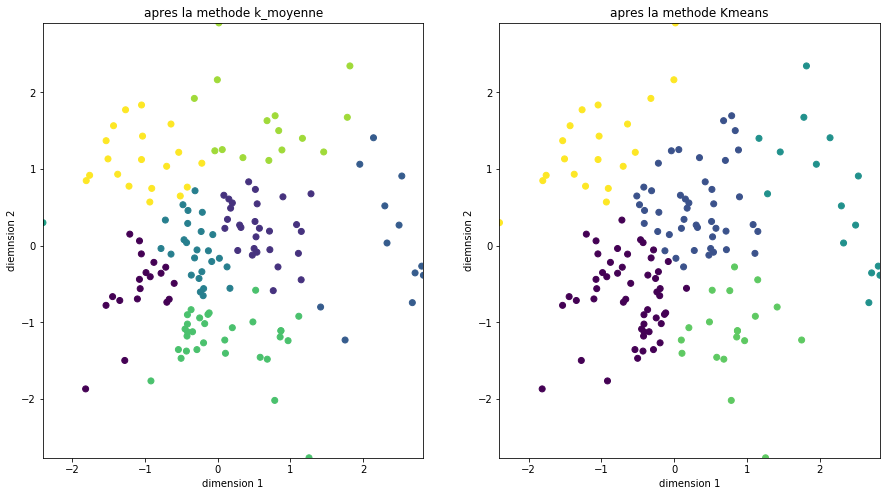

In [102]:
label = k_moyenne(x_l,8)['label']
label2 = KMeans(n_clusters=5).fit(x_l).labels_

plt.figure(figsize=(15,8))
plt.subplot(121)
plt.title('apres la methode k_moyenne')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.subplot(122)
plt.title('apres la methode Kmeans')
plt.scatter(x, y, c=label2)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

<p style="color:green">Selon le résultat obtenu, pour la méthode LDA on a obetnu toujours les mêmes graphes</p>

<h3 style="color:#8080C0">B. Analyse des données « choix projet » :</h3>
<h4>1. Utilisez le package csv (ou l’importation de variable de Spyder) pour lire le fichier et remplir deux variables : la liste des codes « C » représentant les étudiant (première colonne) et la matrice « M » des données (tout sauf la première ligne et la première colonne). La matrice M doit être de type array du package numpy. Faites attentions à ce que les valeurs dans M soient bien numériques (1, 2, 3) et non textuelle (‘1’, ‘2’, ‘3’). Vous pouvez utiliser la méthode astype de numpy en cas de besoin.</h4>

In [75]:
import pandas as pd
choix_projet = pd.read_csv("choixprojetstab.csv",sep=";")
C = choix_projet['étudiant·e']
C

0     bl/.vSDYCGrSs
1     bl/1NiMubceBs
2     bl/dvgMTLVSvk
3     bl1NWhKcNADF2
4     bl1ao5B7htJfQ
          ...      
66    blvqKhCDhQab.
67    blwyn40XjgvEs
68    bly3Oqsvf6WlU
69    bly69tf4z1FiM
70    blzon470EHguA
Name: étudiant·e, Length: 71, dtype: object

In [76]:
M = choix_projet.drop(['étudiant·e'],axis=1).to_numpy()
M

array([[1, 1, 1, ..., 1, 1, 3],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]])

<h4>
2. Dans sklearn.cluster il existe différents algorithmes de clustering. Testez les différents algorithmes du package et proposez le meilleur clustering possible des données selon l’indice Silhouette.</h4>

{'k_moyenne': 0.48482009995107633,
 'KMeans': 0.6278458398111872,
 'DBSCAN': 0.15638076284454847,
 'SpectralClustering': 0.6366698305094276}

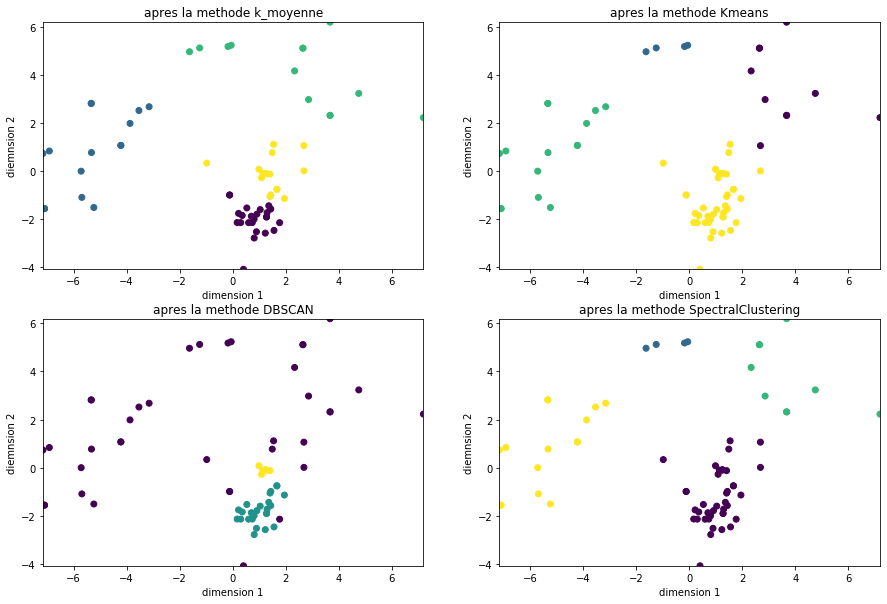

In [119]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

dic_silhoutte={}
pca = PCA(n_components=2)
x_p = pca.fit(M).transform(M)

x = x_p[:,0]
y = x_p[:,1]
x_min,x_max = x.min(),x.max()
y_min,y_max = y.min(),y.max()

label = k_moyenne(x_p,4)['label']
label2 = KMeans(n_clusters=4).fit(x_p).labels_
label3 = DBSCAN(eps=0.5, min_samples=4).fit(x_p).labels_
label4 = SpectralClustering(n_clusters=4,assign_labels="discretize",random_state=0).fit(x_p).labels_

dic_silhoutte['k_moyenne']= silhouette_score(x_p, label)
dic_silhoutte['KMeans']= silhouette_score(x_p, label2)
dic_silhoutte['DBSCAN']= silhouette_score(x_p, label3)
dic_silhoutte['SpectralClustering']= silhouette_score(x_p, label4)

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('apres la methode k_moyenne')
plt.scatter(x, y, c=label)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.subplot(222)
plt.title('apres la methode Kmeans')
plt.scatter(x, y, c=label2)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.subplot(223)
plt.title('apres la methode DBSCAN')
plt.scatter(x, y, c=label3)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.subplot(224)
plt.title('apres la methode SpectralClustering')
plt.scatter(x, y, c=label4)
plt.xlabel('dimension 1')
plt.ylabel('diemnsion 2')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

dic_silhoutte

<p style="color:green">On peut voir très bien sur les graphes et les silhouette_score, la méthode KMeans et la méthode SpectralClustering sont très proche et ont tous eu une bonne note sur silhouette_score</p>